# Analisis del comportamiento de la cuota de mercado vs distancia

Queremos predecir las ventas de una tienda basándonos en la cuota de mercado que alcanza de un CP dependiendo de la distancia a ese CP.

In [7]:
# Instalación del paquete necesario
!pip install scikit-learn


     ---------------------------------------- 7.2/7.2 MB 6.5 MB/s eta 0:00:00
     ---------------------------------------- 37.0/37.0 MB 7.0 MB/s eta 0:00:00
     -------------------------------------- 307.0/307.0 KB 6.3 MB/s eta 0:00:00


### Código todo en uno ejecutable

In [1]:
%pylab inline
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

import pickle

### Funciones:
# MAPE
def mape(pred,y_test):
    return np.mean(np.abs((pred-y_test)/y_test))
# Correlación
from sklearn.metrics import make_scorer
def corr(pred,y_test):
    return np.corrcoef(pred,y_test)[0][1]
# BIAS
from sklearn.metrics import make_scorer
def bias(pred,y_test):
    return np.mean(pred-y_test)

# Importamos el export del ejercicio anterior (venta de cada tienda, tamaño del mercado y %cuota de mercado basado en la distancia)
df = pd.read_csv("04_Output_CMP_Dist_sales.csv")

# Usamos la distancia como "x" y la cuota de mercado como "y"
x = df[['Roundist']]
y = df["MShare"]

# Cargamos la librería split train test
from sklearn.model_selection import train_test_split

# Train 80% | Test 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

### Tras ver el ejercicio por partes, nos quedamos con el DT + GS

# Creamos instancia del modelo (minimizando MAE)
regd = GridSearchCV(DecisionTreeRegressor(),
    param_grid={'max_depth':np.arange(1,50)},
    scoring='neg_mean_absolute_error')

# Entrenamos el modelo
regd.fit(x_train, y_train)

### Export the model
pickle.dump(regd, open("05_Output_Regression_DT.pickle","wb"))

### Métricas
MAE_DT = np.mean(np.abs(cross_val_score(regd, x, y, cv=5, scoring="neg_mean_absolute_error")))
MAPE_DT = np.mean(cross_val_score(regd,x,y,cv=5,scoring=make_scorer(mape)))
RMSE_DT = np.sqrt(np.abs(np.mean(cross_val_score(regd, x, y, cv=5, scoring="neg_mean_squared_error"))))
COR_DT = np.mean(cross_val_score(regd,x,y,cv=5,scoring=make_scorer(corr)))
BIAS_DT = np.mean(cross_val_score(regd,x,y,cv=5,scoring=make_scorer(bias)))

print("MAE: ", "{:.4f}".format(MAE_DT), "\nMAPE:", "{:.4f}".format(MAPE_DT), "\nRMSE:","{:.4f}".format(RMSE_DT),"\nCORR:","{:.4f}".format(COR_DT),"\nBIAS:","{:.4f}".format(BIAS_DT))

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
MAE:  0.0162 
MAPE: 0.3927 
RMSE: 0.0235 
CORR: 0.7288 
BIAS: 0.0001


--------

### Ejercicio por partes

In [2]:
%pylab inline
import pandas as pd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


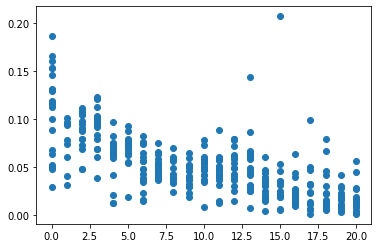

In [4]:
# Importamos el export del ejercicio anterior (venta de cada tienda, tamaño del mercado y %cuota de mercado basado en la distancia)
df = pd.read_csv("04_Output_CMP_Dist_sales.csv")

# Usamos la distancia como "x" y la cuota de mercado como "y"
x = df[['Roundist']]
y = df["MShare"]

#Le echamos un vistazo:
plt.scatter(x,y);

--------

# Vamos a encontrar el modelo que más se acerque a la realidad
##### Métodos:
Linear regression  
K-Neighbors + GS  
DecisionTree + GS
##### Métricas:
MAE. Mean Absolute Error. (Mean of all the prediction errors)  
MAPE. Mean Absolute Percentage error. (Mean Absolute Error / Mean real values)  
RMSE. Root Mean Square Error (High errors affects more than small ones)  
Correlation (between the prediction and the real value)  
Bias (Average of errors)  
  
Split train | test = 80% | 20%

In [5]:
# Cargamos la librería split train test
from sklearn.model_selection import train_test_split

# Train 80% | Test 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# Linear regression

#### Entrenamos el modelo

In [6]:
# Librería
from sklearn.linear_model import LinearRegression

# Creamos instancia del modelo
reg = LinearRegression()

# Entrenamos el modelo
reg.fit(x_train,y_train)

LinearRegression()

#### Métricas

In [7]:
### Librerías de métricas:
# MAE
from sklearn.metrics import mean_absolute_error
# RMSE
from sklearn.metrics import mean_squared_error

#### Las usamos con las predicciones:
# MAE
MAE_LR = mean_absolute_error(reg.predict(x_test),y_test)
# MAPE
#MAPE_LR = np.mean(np.abs(reg.predict(x_test)-y_test)/y_test)
MAPE_LR = np.mean(np.abs(reg.predict(x_test)-y_test)/y_test)
# RMSE
RMSE_LR = np.sqrt(mean_squared_error(reg.predict(x_test),y_test))
# Correlación
COR_LR = np.corrcoef(reg.predict(x_test),y_test)[0][1]
# BIAS
BIAS_LR = np.mean(reg.predict(x_test)-y_test)

### Vemos las métricas
print("MAE: ", "{:.4f}".format(MAE_LR), "\nMAPE:", "{:.4f}".format(MAPE_LR), "\nRMSE:","{:.4f}".format(RMSE_LR),"\nCORR:","{:.4f}".format(COR_LR),"\nBIAS:","{:.4f}".format(BIAS_LR))

MAE:  0.0188 
MAPE: 0.7556 
RMSE: 0.0247 
CORR: 0.7902 
BIAS: -0.0024


#### Imprimimos la solución

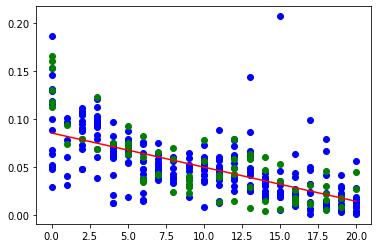

In [8]:
# Azul: train data, Verde: test data, Rojo: modelo
plt.scatter(x_train, y_train,c='b')
plt.scatter(x_test, y_test,c='g')
xkk = np.linspace(0,20,200)
plt.plot(xkk, reg.coef_*xkk+reg.intercept_, 'r');

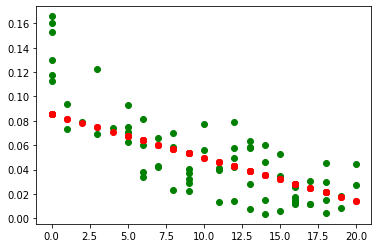

In [9]:
# Verde: test data, Rojo: predicción
plt.scatter(x_test, y_test,c='g')
plt.scatter(x_test, reg.predict(x_test),c='r');

# K-Neighbors + GS

#### Entrenamos el modelo

In [10]:
### Librerías
# KNeighbors
from sklearn.neighbors import KNeighborsRegressor
# GridSearch
from sklearn.model_selection import GridSearchCV

# Creamos instancia del modelo (minimizando MAE)
regk = GridSearchCV(KNeighborsRegressor(),
    param_grid={"n_neighbors":np.arange(1,50)},
    scoring="neg_mean_absolute_error")

# Entrenamos el modelo
regk.fit(x_train, y_train)

# El mejor parámetro para KNeighborThe best parameter for this data with this score
regk.best_estimator_

KNeighborsRegressor(n_neighbors=40)

#### Métricas

In [11]:
# MAE
MAE_KN = mean_absolute_error(regk.best_estimator_.predict(x_test),y_test)
# MAPE
MAPE_KN = np.mean(np.abs(regk.best_estimator_.predict(x_test)-y_test)/y_test)
# RMSE
RMSE_KN = np.sqrt(mean_squared_error(regk.best_estimator_.predict(x_test),y_test))
# Correlación
COR_KN = np.corrcoef(regk.best_estimator_.predict(x_test),y_test)[0][1]
# BIAS
BIAS_KN = np.mean(regk.best_estimator_.predict(x_test)-y_test)

### Vemos las métricas
print("MAE: ", "{:.4f}".format(MAE_KN), "\nMAPE:", "{:.4f}".format(MAPE_KN), "\nRMSE:","{:.4f}".format(RMSE_KN),"\nCORR:","{:.4f}".format(COR_KN),"\nBIAS:","{:.4f}".format(BIAS_KN))

MAE:  0.0184 
MAPE: 0.8129 
RMSE: 0.0239 
CORR: 0.8248 
BIAS: -0.0019


#### Imprimimos la solución

C:\Users\frpla1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


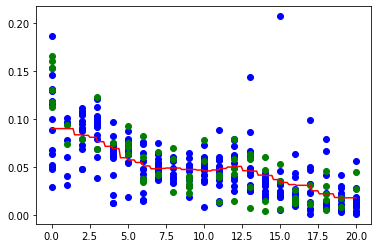

In [12]:
# Azul: train data, Verde: test data, Rojo: modelo
plt.scatter(x_train, y_train,c='b')
plt.scatter(x_test, y_test,c='g')
xkk = np.linspace(0,20,200)
plt.plot(xkk, regk.best_estimator_.predict(xkk[:, np.newaxis]), c='r');

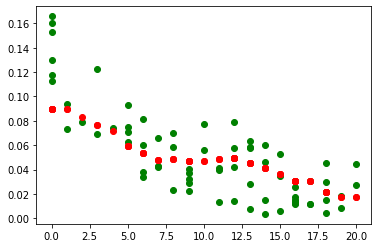

In [13]:
# Verde: test data, Rojo: predicción
plt.scatter(x_test, y_test,c='g')
plt.scatter(x_test, regk.best_estimator_.predict(x_test),c='r');

# Decision tree (regression) + GS

#### Entrenamos el modelo

In [14]:
# Librería
from sklearn.tree import DecisionTreeRegressor

# Creamos instancia del modelo (minimizando MAE)
regd = GridSearchCV(DecisionTreeRegressor(),
    param_grid={'max_depth':np.arange(1,50)},
    scoring='neg_mean_absolute_error')

# Entrenamos el modelo
regd.fit(x_train, y_train)

# El mejor parámetro para KNeighborThe best parameter for this data with this score
regd.best_estimator_

DecisionTreeRegressor(max_depth=3)

#### Métricas

In [15]:
# MAE
MAE_DT = mean_absolute_error(regd.best_estimator_.predict(x_test),y_test)
# MAPE
MAPE_DT = np.mean(np.abs(regd.best_estimator_.predict(x_test)-y_test)/y_test)
# RMSE
RMSE_DT = np.sqrt(mean_squared_error(regd.best_estimator_.predict(x_test),y_test))
# Correlación
COR_DT = np.corrcoef(regd.best_estimator_.predict(x_test),y_test)[0][1]
# BIAS
BIAS_DT = np.mean(regd.best_estimator_.predict(x_test)-y_test)

### Vemos las métricas
print("MAE: ", "{:.4f}".format(MAE_DT), "\nMAPE:", "{:.4f}".format(MAPE_DT), "\nRMSE:","{:.4f}".format(RMSE_DT),"\nCORR:","{:.4f}".format(COR_DT),"\nBIAS:","{:.4f}".format(BIAS_DT))

MAE:  0.0174 
MAPE: 0.7729 
RMSE: 0.0219 
CORR: 0.8463 
BIAS: -0.0011


#### Imprimimos la solución

C:\Users\frpla1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


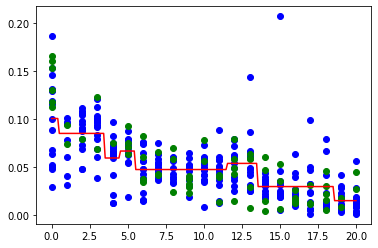

In [16]:
# Azul: train data, Verde: test data, Rojo: modelo
plt.scatter(x_train, y_train,c='b') # Plot the train data
plt.scatter(x_test, y_test,c='g') # Plot the test data
xkk = np.linspace(0,20,200)
plt.plot(xkk, regd.best_estimator_.predict(xkk[:, np.newaxis]), c='r'); # Plot the prediction

Plot prediction and test values

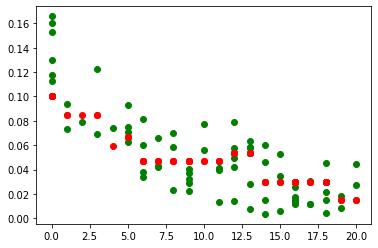

In [17]:
# Verde: test data, Rojo: predicción
plt.scatter(x_test, y_test,c='g') # Plot the test data
plt.scatter(x_test, regd.best_estimator_.predict(x_test),c='r'); # Plot the test data

--------

# Compare the metrics

In [18]:
comparison = pd.DataFrame({
    'Model':['LinearRegression', 'K-Neighbors_GS', 'DecisionTree_GS'],
    'MAE':[MAE_LR, MAE_KN, MAE_DT],
    'MAPE':[MAPE_LR, MAPE_KN, MAPE_DT],
    'RMSE':[RMSE_LR, RMSE_KN, RMSE_DT],
    'Correlation':[COR_LR, COR_KN, COR_DT],
    'BIAS':[BIAS_LR, BIAS_KN, BIAS_DT]})
comparison

,Model,MAE,MAPE,RMSE,Correlation,BIAS
0,LinearRegression,0.018807,0.755644,0.024685,0.790180,-0.002416
1,K-Neighbors_GS,0.018418,0.812912,0.023853,0.824777,-0.001871
2,DecisionTree_GS,0.017421,0.772947,0.021877,0.846346,-0.001084


--------

# Cross validation

In [19]:
### Librerías:
# Cross validation
from sklearn.model_selection import cross_val_score
# Scoring personalizado
from sklearn.metrics import make_scorer

### Funciones:
# MAPE
def mape(pred,y_test):
    return np.mean(np.abs((pred-y_test)/y_test))
# Correlación
from sklearn.metrics import make_scorer
def corr(pred,y_test):
    return np.corrcoef(pred,y_test)[0][1]
# BIAS
from sklearn.metrics import make_scorer
def bias(pred,y_test):
    return np.mean(pred-y_test)

### Logistic Regression
MAE_LR = np.mean(np.abs(cross_val_score(reg, x, y, cv=5, scoring="neg_mean_absolute_error")))
MAPE_LR = np.mean(cross_val_score(reg,x,y,cv=5,scoring=make_scorer(mape)))
RMSE_LR = np.sqrt(np.abs(np.mean(cross_val_score(reg, x, y, cv=5, scoring="neg_mean_squared_error"))))
COR_LR = np.mean(cross_val_score(reg,x,y,cv=5,scoring=make_scorer(corr)))
BIAS_LR = np.mean(cross_val_score(reg,x,y,cv=5,scoring=make_scorer(bias)))

### K-Neighbors + GS
MAE_KN = np.mean(np.abs(cross_val_score(regk, x, y, cv=5, scoring="neg_mean_absolute_error")))
MAPE_KN = np.mean(cross_val_score(regk,x,y,cv=5,scoring=make_scorer(mape)))
RMSE_KN = np.sqrt(np.abs(np.mean(cross_val_score(regk, x, y, cv=5, scoring="neg_mean_squared_error"))))
COR_KN = np.mean(cross_val_score(regk,x,y,cv=5,scoring=make_scorer(corr)))
BIAS_KN = np.mean(cross_val_score(regk,x,y,cv=5,scoring=make_scorer(bias)))

### Decision Tree (Regression) + GS
MAE_DT = np.mean(np.abs(cross_val_score(regd, x, y, cv=5, scoring="neg_mean_absolute_error")))
MAPE_DT = np.mean(cross_val_score(regd,x,y,cv=5,scoring=make_scorer(mape)))
RMSE_DT = np.sqrt(np.abs(np.mean(cross_val_score(regd, x, y, cv=5, scoring="neg_mean_squared_error"))))
COR_DT = np.mean(cross_val_score(regd,x,y,cv=5,scoring=make_scorer(corr)))
BIAS_DT = np.mean(cross_val_score(regd,x,y,cv=5,scoring=make_scorer(bias)))

### Tabla comparativa
comparison = pd.DataFrame({
    'Model':['LinearRegression', 'K-Neighbors_GS', 'DecisionTree_GS'],
    'MAE':[MAE_LR, MAE_KN, MAE_DT],
    'MAPE':[MAPE_LR, MAPE_KN, MAPE_DT],
    'RMSE':[RMSE_LR, RMSE_KN, RMSE_DT],
    'Correlation':[COR_LR, COR_KN, COR_DT],
    'BIAS':[BIAS_LR, BIAS_KN, BIAS_DT]})
comparison

,Model,MAE,MAPE,RMSE,Correlation,BIAS
0,LinearRegression,0.017154,0.419345,0.024875,0.689635,0.000092
1,K-Neighbors_GS,0.016504,0.401336,0.023858,0.713233,-0.000009
2,DecisionTree_GS,0.016198,0.392657,0.023486,0.728761,0.000123


# Export models

In [20]:
### Export the model
import pickle
pickle.dump(reg, open("Regression_LR.pickle","wb"))
pickle.dump(regk, open("Regression_KN.pickle","wb"))
pickle.dump(regd, open("Regression_DT.pickle","wb"))

In [114]:
### Import a model
import pickle
LR_model = pickle.load(open("Regression_LR.pickle","rb"))
KN_model = pickle.load(open("Regression_KN.pickle","rb"))
DT_model = pickle.load(open("Regression_DT.pickle","rb"))